In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [46]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [47]:
init_notebook_mode(connected=True)
cf.go_offline()

In [48]:
df=pd.read_csv('LINEARALKYLBENZENE.csv')

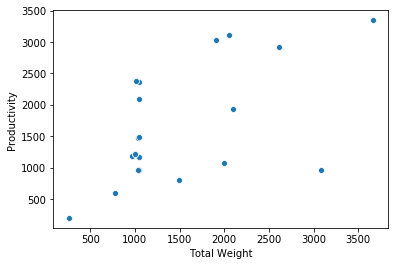

In [49]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [50]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.00000,24.000000,21.000000
mean,272.708333,194020.958333,13.791667,15.578333,1430.336875,0.014167,0.001417,0.0,1.182083,0.02000,1574.113750,13248.296667
std,125.939419,3882.067574,18.412223,19.465547,797.466223,0.008805,0.000881,0.0,2.618772,0.09798,864.950851,2463.085663
min,36.000000,191234.000000,0.000000,0.000000,258.285000,0.000000,0.000000,0.0,0.000000,0.00000,197.630000,9041.000000
25%,144.750000,191474.000000,0.000000,0.000000,1008.654750,0.010000,0.001000,0.0,0.000000,0.00000,963.270000,12114.000000
50%,288.500000,192268.000000,10.400000,12.235000,1050.000000,0.010000,0.001000,0.0,0.000000,0.00000,1195.980000,12874.810000
75%,342.000000,194402.250000,20.225000,22.775000,1928.078500,0.020000,0.002000,0.0,0.000000,0.00000,2163.540000,15358.700000
max,500.000000,200919.000000,76.830000,78.370000,3666.380000,0.040000,0.004000,0.0,9.200000,0.48000,3345.750000,18433.200000


In [51]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [52]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print(lm.intercept_)

749.8213892984219


In [54]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.560709


In [55]:
predictions = lm.predict(X_test)

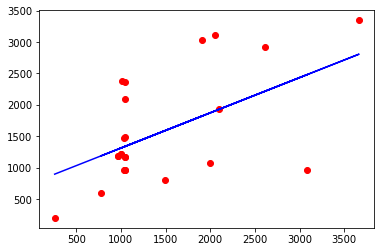

In [56]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 539.6906977906131
MSE: 516256.5233823745
RMSE: 718.5099326956966
r2_score: 0.3857889114023435


In [58]:
#joblib.dump(lm,"Linear_Alkyl_Benzene.pkl")#only execute if rmse is less than half of mean of productivity